In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

We'll use the heart disease data set for this tutorial
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?select=heart.csv

In [2]:
df = pd.read_csv('heart.csv')

## Exploratory Data Analysis (EDA)

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Data Transformation

Divide the data to Features (X) and Target (y)

In [7]:
X = df.drop('HeartDisease', axis=1)
y= df['HeartDisease']

In [8]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [9]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


explaining the importance of random seed

In [10]:

np.random.random((3, 2))

array([[0.08183609, 0.51719387],
       [0.88354477, 0.58288908],
       [0.29857506, 0.10934478]])

In [11]:
np.random.seed(5)
np.random.random((3, 2))

array([[0.22199317, 0.87073231],
       [0.20671916, 0.91861091],
       [0.48841119, 0.61174386]])

 ## Split Dataset
 To split the data into train and test set use trains_test_split from sklearn.model-selection
 you can specify the text_size proportion you want for example uisng 0.3 means you want to use 30% of the data as test and 70% as training

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [13]:
# view x_train
x_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
348,69,M,ASY,137,0,0,ST,104,Y,1.6,Flat
555,58,M,NAP,150,219,0,ST,118,Y,0.0,Flat
398,52,M,ASY,165,0,1,Normal,122,Y,1.0,Up
849,62,M,NAP,130,231,0,Normal,146,N,1.8,Flat
88,43,M,TA,120,291,0,ST,155,N,0.0,Flat
...,...,...,...,...,...,...,...,...,...,...,...
218,55,M,ATA,140,196,0,Normal,150,N,0.0,Up
223,33,M,NAP,120,298,0,Normal,185,N,0.0,Up
271,32,F,ATA,105,198,0,Normal,165,N,0.0,Up
474,62,M,ATA,131,0,0,Normal,130,N,0.1,Up


In [14]:
y_train

348    1
555    1
398    1
849    0
88     1
      ..
218    0
223    0
271    0
474    0
355    1
Name: HeartDisease, Length: 642, dtype: int64

In [15]:
x_test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
358,38,M,NAP,115,0,0,Normal,128,Y,0.0,Flat
333,40,M,ASY,95,0,1,ST,144,N,0.0,Up
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat
364,56,M,NAP,120,0,0,Normal,97,N,0.0,Flat
204,56,M,ATA,130,184,0,Normal,100,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
446,54,M,ASY,130,0,0,ST,117,Y,1.4,Flat
77,35,F,ASY,140,167,0,Normal,150,N,0.0,Up
522,50,M,ASY,144,349,0,LVH,120,Y,1.0,Up
222,48,F,NAP,120,195,0,Normal,125,N,0.0,Up


In [16]:
y_test

358    1
333    1
13     1
364    0
204    0
      ..
446    1
77     0
522    1
222    0
491    1
Name: HeartDisease, Length: 276, dtype: int64

# Train the model

Lets's train the model using RandomForestClassifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
# lets instantiate the model
model = RandomForestClassifier()

In [19]:
model

RandomForestClassifier()

opps, we got an error, ddo you know why?

Because Randomforest models work with numeric features but we have some categorical data.

Now lets's see how we can fix this

In [20]:
model.fit(x_train, y_train)

ValueError: could not convert string to float: 'M'

# data encoding

To fix this we need to encode the data using OneHotEncoder, it converts categorical variables to numeric

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
# instantiate OneHotEncoder
one_hot = OneHotEncoder()

In [23]:
# let's see what our onehotencoder would return
# it increased the number of columns to 526
# There are different ways to go about this, you can separate the categorical values from numeric and use your onehotencoder on just the categorical columns
# But in this case I used it on all the dataframe
pd.DataFrame(one_hot.fit_transform(X).toarray())

,0,1,2,3,4,5,6,7,8,9,...,517,518,519,520,521,522,523,524,525,526
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
transformed_x = pd.DataFrame(one_hot.fit_transform(X).toarray())

In [25]:
# let's split our data again
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.3, random_state=20)

In [26]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,517,518,519,520,521,522,523,524,525,526
348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
223,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
271,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Now our X has been transformed lets train the model again

In [27]:
model = RandomForestClassifier()
np.random.seed(100)
model.fit(x_train, y_train)

RandomForestClassifier()

In [28]:
# use .score to score the model (see performance on the training data)
model.score(x_train, y_train)

1.0

In [29]:
# use .score to score the model (see performance on the test data)
model.score(x_test, y_test)

0.8804347826086957

In [31]:
# Get the default parameters used to train the model
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
# the default n_estimators parameter used is 100, so including it doesn't change the model performance
model = RandomForestClassifier(n_estimators=100)
np.random.seed(100)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8804347826086957

# Hyperparameter tunning 
There are different method to tune hyperparameters
* Manual
* Random search CV
* Grid Search CV

In this example we'll tune our parameter manually



In [38]:
# let's try training our model on a range of n_estimators.
np.random.seed(100)
for est in range(10, 300, 10):
    model = RandomForestClassifier(n_estimators=est)
    
    model.fit(x_train, y_train)
    
    print(f"Model accuracy on test set: {est, model.score(x_test, y_test)}")

Model accuracy on test set: (10, 0.8623188405797102)
Model accuracy on test set: (20, 0.8840579710144928)
Model accuracy on test set: (30, 0.8586956521739131)
Model accuracy on test set: (40, 0.8876811594202898)
Model accuracy on test set: (50, 0.8768115942028986)
Model accuracy on test set: (60, 0.8804347826086957)
Model accuracy on test set: (70, 0.8768115942028986)
Model accuracy on test set: (80, 0.8695652173913043)
Model accuracy on test set: (90, 0.8804347826086957)
Model accuracy on test set: (100, 0.8731884057971014)
Model accuracy on test set: (110, 0.8768115942028986)
Model accuracy on test set: (120, 0.8768115942028986)
Model accuracy on test set: (130, 0.8731884057971014)
Model accuracy on test set: (140, 0.8768115942028986)
Model accuracy on test set: (150, 0.8768115942028986)
Model accuracy on test set: (160, 0.8768115942028986)
Model accuracy on test set: (170, 0.8804347826086957)
Model accuracy on test set: (180, 0.8731884057971014)
Model accuracy on test set: (190, 0.8

In [43]:
# from the above you see n_estimators=40 had the best score. 
# The higher the n_estimators the longer time it takes
# You need to balance the time it takes and the result 
np.random.seed(100)
model = RandomForestClassifier(n_estimators=40)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8623188405797102

In [47]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [ ]:
y_test

358    1
333    1
13     1
364    0
204    0
      ..
446    1
77     0
522    1
222    0
491    1
Name: HeartDisease, Length: 276, dtype: int64

## Logistic Regression
Lets train the model using Logistic regression

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
np.random.seed(100)
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.8659420289855072

# Evaliuating the model

There are differnt technique to evaluate a classification model


In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       127
           1       0.84      0.91      0.88       149

    accuracy                           0.86       276
   macro avg       0.87      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



In [49]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[102,  25],
       [ 13, 136]], dtype=int64)

<AxesSubplot:>

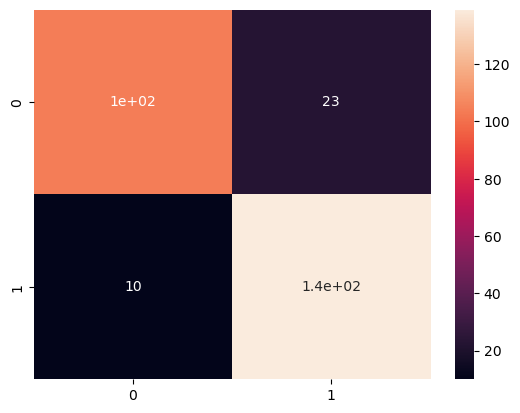

In [ ]:
sns.heatmap(conf_mat, annot=True)

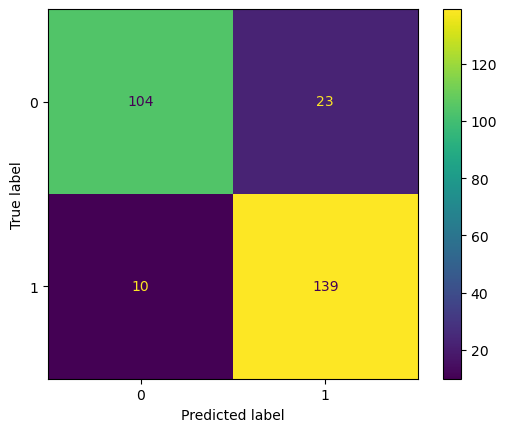

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_pred);

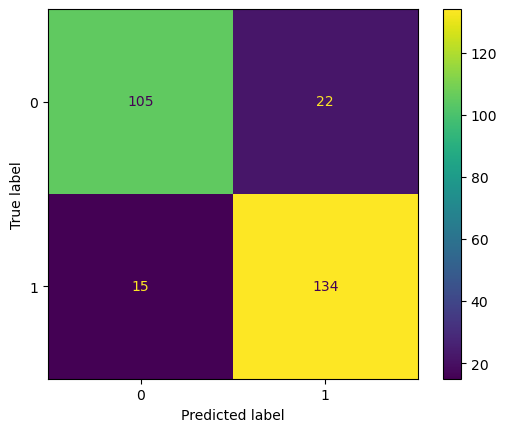

In [ ]:
y_pred_lr = lr.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_pred_lr);

# saving model

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open("rf_model.pkl", 'wb'))

In [ ]:
model2= pickle.load(open("rf_model.pkl", 'rb'))

In [ ]:
model.score(x_test, y_test)

0.8804347826086957

In [ ]:
model2.score(x_test, y_test)

0.8804347826086957

## Over fitting

Overfitting occurs when there's a data leakage, and occurs when test data was included in the training data

You have a perfect score on the test data


In [50]:
model = RandomForestClassifier()
np.random.seed(100)
model.fit(transformed_x, y)

RandomForestClassifier()

In [51]:
model.score(x_train, y_train)

1.0

In [52]:
model.score(x_test, y_test)

1.0